In [1]:
from sumo_deeprl import SumoDeepRl
import os
import traci
from stable_baselines3.dqn.dqn import DQN

### Init Sumo-DeepRl class

In [6]:
junction = 'simple_2_intersection'
junction = 'saint_paul'
#reward = 'average-speed'
#reward = 'pressure'
reward = 'queue'
#reward="diff-waiting-time"
sim_time='1.0hour'
time = 1*3600
vphs = [3500,4500]

In [3]:
sumo = SumoDeepRl(junction_name=junction)

### Generate Trips (optional)

In [8]:
route_details = {'n': ['-E1', 2], 
                 's': ['-E3', 3],
                 'e': ['E0', 4],
                 'w': ['-E2', 3]}
route_details = {'n': ['-E2', 4], 
                 's': ['-E0', 3],
                 'e': ['-E3', 2],
                 'w': ['-E1', 3]}
for cars in vphs:
  sumo.create_routes(route_details=route_details, time=time, total_cars=cars)

Create Success
Create Success


### Simulation

In [ ]:
#sumo.simulation(sim_time=sim_time,route_file='5000.rou.xml', useGui=True)
sumo.analyze_fixed(sim_time=sim_time,vphs=vphs, useGui=False)

In [ ]:
traci.close()

### Model

In [4]:
"""
reward_fns = {
  "diff-waiting-time": _diff_waiting_time_reward, # sum waiting time(t) - sum waiting time(t+1)
  "average-speed": _average_speed_reward, # average speed of every car
  "queue": _queue_reward, # -1 * total number of halting cars
  "pressure": _pressure_reward, # Returns the pressure (#veh leaving - #veh approaching) of the intersection.
}
"""

train_num_veh = '4000'

env = sumo.create_environment(sim_time=sim_time,route_file=f'{train_num_veh}.rou.xml', num_seconds=7500,yellow_time=5, reward_fn=reward)

 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      


In [5]:
model = DQN(
  env=env,
  policy="MlpPolicy",
  learning_starts=0,
  train_freq=1,
  exploration_initial_eps=0.05,
  exploration_final_eps=0.01,
  verbose=1
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, reset_num_timesteps=False)


out_dir = f"{junction}/{sim_time}/model/{reward}"
if not os.path.exists(out_dir):
  os.makedirs(out_dir)
fullname = os.path.join(out_dir, train_num_veh)   
model.save(fullname)
env.close()

### Result from model

In [6]:
train_model = DQN.load(f'{junction}/{sim_time}/model/{reward}/{train_num_veh}.zip', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
#sumo.predict(sim_time=sim_time,route_file='4000.rou.xml', model=train_model, useGui=True, yellow_time=5)
sumo.analyze_predict(model=train_model, sim_time=sim_time, vphs=vphs, trained_number_veh=train_num_veh, reward=reward,yellow_time=5, num_seconds=100000)

 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds


Step #86640.00 (0ms ?*RT. ?UPS, TraCI: 3ms, vehicles TOT 1004 ACT 0 BUF 0)                0ms ?*RT. ?UPS, TraCI: 19ms, vehicles TOT 1004 ACT 72 BUF 0)              
1000 cars: waiting time 4378140.0, clear time: 86634.0
 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 6ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds


Step #96100.00 (1ms ~= 1000.00*RT, ~485000.00UPS, TraCI: 0ms, vehicles TOT 2009 ACT 42000 cars: waiting time 8990067.0, clear time: 100002.0hicles TOT 2009 ACT 564 
Step #100002.00 (1ms ~= 1000.00*RT, ~449000.00UPS, TraCI: 123ms, vehicles TOT 2009 ACT 449
 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 2ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds


Step #91700.00 (1ms ~= 1000.00*RT, ~818000.00UPS, TraCI: 0ms, vehicles TOT 3008 ACT 818 B3000 cars: waiting time 17003468.0, clear time: 100002.0 TOT 3008 ACT 938 B
Step #100002.00 (1ms ~= 1000.00*RT, ~728000.00UPS, TraCI: 170ms, vehicles TOT 3008 ACT 728
 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 10ms, vehicles TOT 0 ACT 0 BUF 0)                     
 Retrying in 1 seconds


Step #73100.00 4000 cars: waiting time 24725891.0, clear time: 100002.0OT 3999 ACT 1435 BU2ms ~= 500.00*RT, ~726000.00UPS, TraCI: 329ms, vehicles TOT 3999 ACT 1452 
Step #100002.00 (1ms ~= 1000.00*RT, ~1129000.00UPS, TraCI: 259ms, vehicles TOT 4005 ACT 11
 Retrying in 1 seconds


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 10ms, vehicles TOT 0 ACT 0 BUF 0)                     
 Retrying in 1 seconds


Step #91700.00 (2ms ~= 500.00*RT, ~726000.00UPS, TraCI: 0ms, vehicles TOT 4780 ACT 1452 B5000 cars: waiting time 22972005.0, clear time: 100002.0 TOT 4691 ACT 1537 
Step #100002.00 (2ms ~= 500.00*RT, ~707500.00UPS, TraCI: 321ms, vehicles TOT 4791 ACT 1415


## Saint Paul

In [ ]:
junction = 'saint_paul'
reward = 'diff-waiting-time'
sim_time='1.0hour'
vphs = [1000, 2000, 3000, 4000, 5000]

In [ ]:
sumo = SumoDeepRl(junction_name=junction)

In [ ]:
sumo.simulation(sim_time='1.0hour', route_file='1000.rou.xml', useGui=True)

In [ ]:
sumo.analyze_fixed(sim_time='1.0hour',vphs=[1000, 2000, 3000, 4000, 5000], useGui=False)

In [ ]:
env = sumo.create_environment(sim_time=sim_time,route_file='3000.rou.xml',num_seconds=15000,yellow_time=5, reward_fn=reward)

In [ ]:
train_model = DQN.load(f'{junction}/1.0hour/model/{reward}/3000.zip', env=env)

In [ ]:
sumo.predict(sim_time=sim_time,route_file='3000.rou.xml', model=train_model, useGui=True, yellow_time=5)

In [ ]:
traci.close()

In [ ]:
sumo.analyze_predict(model=train_model,
                     sim_time=sim_time,
                     vphs=vphs,
                     trained_number_veh='3000',
                     reward=reward,
                     yellow_time=5)

In [ ]:
traci.close()

## Table

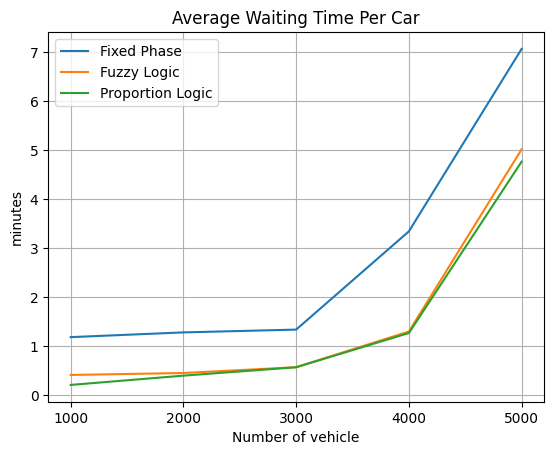

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./saint_paul_1hr.csv')

plt.plot(df['vehicle per hour'], df['waiting_fixed']/df['vehicle per hour']/60, label = "Fixed Phase")
plt.plot(df['vehicle per hour'], df['fuzzy_halting_waiting_time'] /df['vehicle per hour']/60, label = "Fuzzy Logic")
plt.plot(df['vehicle per hour'], df['fuzzy_proportion_waiting_time'] /df['vehicle per hour']/60, label = "Proportion Logic")
plt.xticks(df['vehicle per hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('minutes')
plt.title('Average Waiting Time Per Car')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.plot(df['vehicle per hour'], df['clear_fixed'], label = "Fixed Phase")
plt.plot(df['vehicle per hour'], df['fuzzy_halting_clear_time'], label = "Fuzzy Logic")
plt.plot(df['vehicle per hour'], df['fuzzy_proportion_clear_time'], label = "Proportion Logic")
plt.xticks(df['vehicle per hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('Seconds')
plt.title('Clear Time')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.plot(df['vehicle per hour'], df['waiting_fixed']/df['vehicle per hour']/60, label = "Fixed Phase")
plt.plot(df['vehicle per hour'], df['fuzzy_proportion_waiting_time'] /df['vehicle per hour']/60, label = "Proportion Logic")
plt.xticks(df['vehicle per hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('minutes')
plt.title('Average Waiting Time Per Car')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.plot(df['vehicle per hour'], df['clear_fixed'], label = "Fixed Phase")
plt.plot(df['vehicle per hour'], df['fuzzy_proportion_clear_time'], label = "Proportion Logic")
plt.xticks(df['vehicle per hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('Seconds')
plt.title('Clear Time')
plt.grid()
plt.legend()
plt.show()

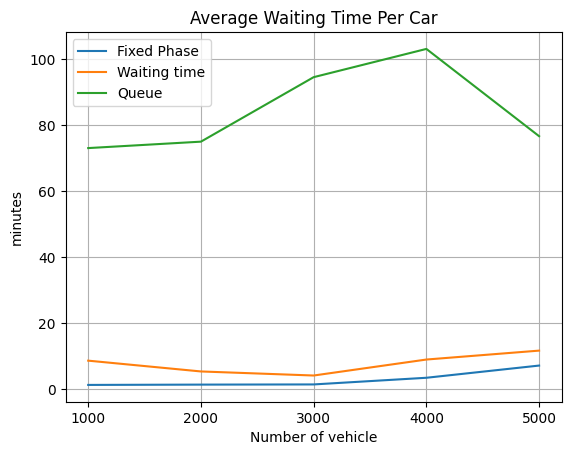

In [12]:
df = pd.read_csv('./saint_paul/1.0hour/result.csv')

plt.plot(df['Vehicle Per Hour'], df['waiting_fixed']/df['Vehicle Per Hour']/60, label = "Fixed Phase")
plt.plot(df['Vehicle Per Hour'], df['diff-waiting-time_4000_waiting_predict']/df['Vehicle Per Hour']/60, label = "Waiting time")
plt.plot(df['Vehicle Per Hour'], df['queue_4000_waiting_predict']/df['Vehicle Per Hour']/60, label = "Queue")
plt.xticks(df['Vehicle Per Hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('minutes')
plt.title('Average Waiting Time Per Car')
plt.grid()
plt.legend()
plt.show()

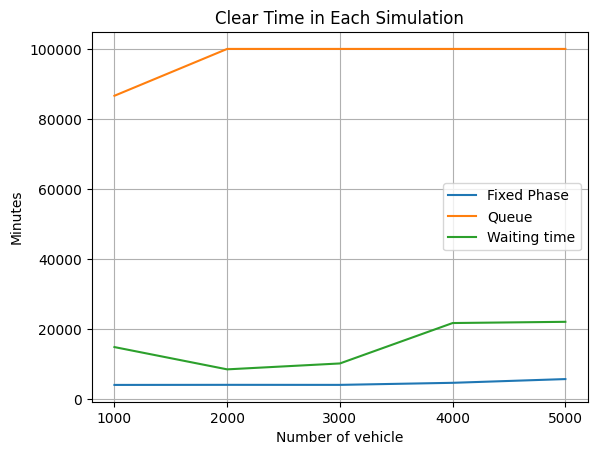

In [14]:
plt.plot(df['Vehicle Per Hour'], df['clear_fixed'], label = "Fixed Phase")
plt.plot(df['Vehicle Per Hour'], df['queue_4000_clear_predict'], label = "Queue")
plt.plot(df['Vehicle Per Hour'], df['diff-waiting-time_4000_clear_predict'], label = "Waiting time")
plt.xticks(df['Vehicle Per Hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('Minutes')
plt.title('Clear Time in Each Simulation')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.plot(df['Vehicle Per Hour'], df['waiting_fixed']/df['Vehicle Per Hour']/60, label = "Fixed Phase")
plt.plot(df['Vehicle Per Hour'], df['diff-waiting-time_4000_waiting_predict']/df['Vehicle Per Hour']/60, label = "Predicted Model reward as waiting time")
plt.xticks(df['Vehicle Per Hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('Minutes')
plt.title('Average Waiting Time for Each Car')
plt.grid()
plt.legend()
plt.show()

In [ ]:
sum(df['waiting_fixed']/df['Vehicle Per Hour']/60)/5, sum(df['diff-waiting-time_4000_waiting_predict']/df['Vehicle Per Hour']/60)/5

In [ ]:
plt.plot(df['Vehicle Per Hour'], df['clear_fixed']/60, label = "Fixed Phase")
plt.plot(df['Vehicle Per Hour'], df['diff-waiting-time_4000_clear_predict']/60, label = "Predicted Model reward as waiting time")
plt.xticks(df['Vehicle Per Hour'])
plt.xlabel('Number of vehicle')
plt.ylabel('Minutes')
plt.title('Clear Time for Each Simulation')
plt.grid()
plt.legend()
plt.show()

In [ ]:
sum(df['clear_fixed']/60)/5, sum(df['diff-waiting-time_4000_clear_predict']/60)/5